# Quantum Computing Experimentation with Amazon Braket
### Chapter 10 - Amazon Braket Hybrid Jobs, Pennylane and other Braket Features

© 2021, 2022, 2023 Packt Publishing

Written by Alex Khan

https://docs.aws.amazon.com/braket/latest/developerguide/braket-jobs.html

pricing help


https://aws.amazon.com/braket/pricing/#:~:text=AWS%20Free%20Tier%20gives%20you,through%20the%20Hybrid%20Jobs%20feature.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import time
%matplotlib inline
from braket.aws import AwsQuantumJob,  AwsSession

In [7]:
matrix="ionq-matrix"
filename=matrix+".csv"

In [8]:
import time
start=0.1
end=0.4
step=0.1
shots=100

param=np.round(np.arange(start,end,step,dtype=float), 2).tolist()

In [17]:
job_name="QAOA-ionqmatrix-Rigetti"+str(int(time.time()))
print(job_name)

QAOA-ionqmatrix-Rigetti1672074458


In [18]:
#Define hyperparameters
#need to be strings
hyperparameters = {
    "start": str(start),
    "end":str(end),
    "step":str(step),
    "shots":str(shots),
    "matrix":matrix
}

In [19]:
job = AwsQuantumJob.create(
    "arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-3",
    source_module="QAOA.py", 
    entry_point="QAOA:start_here",
    job_name=job_name,
    hyperparameters=hyperparameters,
    input_data=filename,
    wait_until_complete=False
)

In [12]:
# uncomment to print out and track job_arn
#job_arn=job.arn
#print(job_arn)

In [13]:
# uncomment and manually add the job_arn below (from previous line) if running the remainder of this code later
#job_arn=''
#job = AwsQuantumJob(arn=job_arn)

In [23]:
status=job.state()
print(status)
if status=='COMPLETED':
    #print(job.metadata())
    print(job.result())

COMPLETED
{'E': [-1.7500000000000002, -1.1300000000000003, -1.1300000000000003, -1.48, -1.0899999999999994, -0.87, -2.0500000000000003, -1.0099999999999998, -1.25, -1.5499999999999998, -0.8000000000000002, -2.0500000000000003, -0.71, -1.3999999999999997, -1.31, -0.74], 'ideal_param1': 0.2, 'ideal_param2': 0.30000000000000004, 'lowest_energy': -2.0500000000000003, 'best_energy': -2.5000000000000004, 'best_solution': '11000001111'}


In [24]:
E = np.array(job.result()['E'])
D= E.reshape(len(param), len(param))

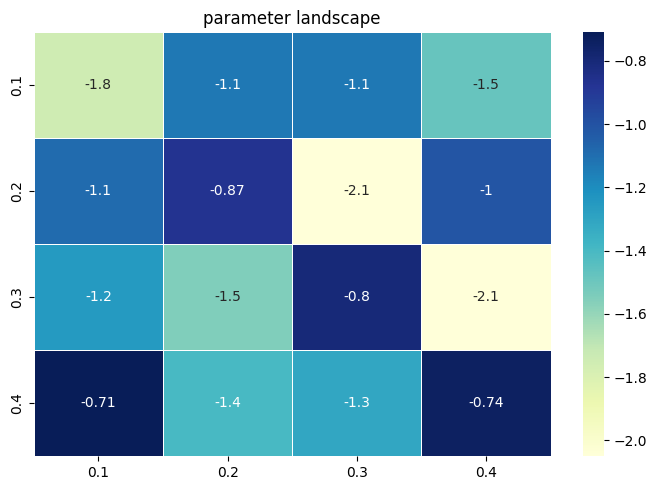

In [25]:
plt.figure(1, figsize=[7, 5])
sns.heatmap(D, annot=True,xticklabels=param, yticklabels=param,  linewidths=.5, cmap="YlGnBu", annot_kws = {'alpha': 1})
plt.title('parameter landscape');
plt.tight_layout();

In [26]:
ideal_param1=job.result()['ideal_param1']
ideal_param2=job.result()['ideal_param2']
lowest_energy=job.result()['lowest_energy']
best_energy=job.result()['best_energy']
best_solution=job.result()['best_solution']
print('ideal_param1:',ideal_param1,'ideal_param2:',ideal_param2,'lowest_energy:',lowest_energy)
print('best_energy:',best_energy,'best_solution:',best_solution)

ideal_param1: 0.2 ideal_param2: 0.30000000000000004 lowest_energy: -2.0500000000000003
best_energy: -2.5000000000000004 best_solution: 11000001111
